In [1]:
import librosa
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Function to load in the spectrogram of each audio file
def file_loader(file_name):
    X, sample_rate = librosa.load(file_name, duration=2.97)
    ps = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    return ps

In [3]:
# load in all rows all sample information from dataset
df = pd.read_csv("train/train.csv") 

In [4]:
# create a unique list of all audio sound choices
catalog = df['Class'].unique().tolist()
catalog = [i for i in enumerate(catalog)]
catalog

[(0, 'siren'),
 (1, 'street_music'),
 (2, 'drilling'),
 (3, 'dog_bark'),
 (4, 'children_playing'),
 (5, 'gun_shot'),
 (6, 'engine_idling'),
 (7, 'air_conditioner'),
 (8, 'jackhammer'),
 (9, 'car_horn')]

In [5]:
# create an array for "Y"
labels = np.empty(0)
# create list of arrays for "X"
transformed_samples = []
# pull through the data and load each file
for i in range(df.shape[0]):
    number = df.iloc[i,0]
    label = df.iloc[i,1]
    filename = f'{number}.wav'
    lbl = f'{label}'
    try:
        ps = file_loader(f'train/train/{filename}')
        if ps.shape != (128, 128): continue
    except:
        print(f"File {filename} didn't work")
        continue
    transformed_samples.append(np.reshape(ps, -1))
    #load in the labels into Y by number
    if label == catalog[0][1]:
        labels = np.append(labels, catalog[0][0])
    elif label == catalog[1][1]:
        labels = np.append(labels, catalog[1][0])
    elif label == catalog[2][1]:
        labels = np.append(labels, catalog[2][0])
    elif label == catalog[3][1]:
        labels = np.append(labels, catalog[3][0])
    elif label == catalog[4][1]:
        labels = np.append(labels, catalog[4][0])
    elif label == catalog[5][1]:
        labels = np.append(labels, catalog[5][0])
    elif label == catalog[6][1]:
        labels = np.append(labels, catalog[6][0])
    elif label == catalog[7][1]:
        labels = np.append(labels, catalog[7][0])
    elif label == catalog[8][1]:
        labels = np.append(labels, catalog[8][0])
    elif label == catalog[9][1]:
        labels = np.append(labels, catalog[9][0])
    

In [6]:
# put transformed_samples into dataframe
df_1 = pd.DataFrame(transformed_samples)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,9.912633,12.610701,9.300829,3.297573,4.655068,5.044219,1.048530,1.559219,1.782135,8.640504,...,4.685921e-06,7.909435e-06,9.165550e-06,6.099369e-06,6.530995e-06,5.510310e-06,5.303133e-06,7.210522e-06,5.260210e-06,0.000420
1,2.661400,4.117083,1.679421,1.527544,1.595737,2.088292,6.244799,2.845641,0.872873,0.603950,...,9.428515e-05,4.775995e-05,4.399524e-05,1.374228e-05,8.436620e-06,7.757358e-06,1.799225e-05,1.284928e-04,2.856303e-04,0.007425
2,0.005557,0.004293,0.002716,0.002533,0.006898,0.006982,0.005634,0.007432,0.014744,0.015015,...,2.457749e-03,2.147882e-03,2.373022e-03,2.072116e-03,2.920827e-03,2.892467e-03,2.193557e-03,3.515167e-03,7.447198e-03,0.010343
3,0.353371,0.096338,0.003695,0.004806,0.004052,0.013310,0.013695,0.020970,0.015848,0.021949,...,1.214701e-09,2.546348e-10,7.933098e-11,2.247661e-10,4.596068e-10,2.116015e-10,7.314918e-11,1.394108e-10,4.291821e-08,0.000476
4,166.046129,102.582782,34.110469,51.670868,44.564469,57.289162,119.480505,65.250017,64.334011,80.964602,...,3.375942e-07,2.726756e-07,4.011556e-07,4.404903e-07,4.052210e-07,5.836523e-07,5.716864e-07,4.060787e-07,5.430899e-07,0.000350


In [7]:
# add the Labels into the dataframe
df_1["Y"] = labels
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Y
0,9.912633,12.610701,9.300829,3.297573,4.655068,5.044219,1.048530,1.559219,1.782135,8.640504,...,7.909435e-06,9.165550e-06,6.099369e-06,6.530995e-06,5.510310e-06,5.303133e-06,7.210522e-06,5.260210e-06,0.000420,0.0
1,2.661400,4.117083,1.679421,1.527544,1.595737,2.088292,6.244799,2.845641,0.872873,0.603950,...,4.775995e-05,4.399524e-05,1.374228e-05,8.436620e-06,7.757358e-06,1.799225e-05,1.284928e-04,2.856303e-04,0.007425,1.0
2,0.005557,0.004293,0.002716,0.002533,0.006898,0.006982,0.005634,0.007432,0.014744,0.015015,...,2.147882e-03,2.373022e-03,2.072116e-03,2.920827e-03,2.892467e-03,2.193557e-03,3.515167e-03,7.447198e-03,0.010343,2.0
3,0.353371,0.096338,0.003695,0.004806,0.004052,0.013310,0.013695,0.020970,0.015848,0.021949,...,2.546348e-10,7.933098e-11,2.247661e-10,4.596068e-10,2.116015e-10,7.314918e-11,1.394108e-10,4.291821e-08,0.000476,0.0
4,166.046129,102.582782,34.110469,51.670868,44.564469,57.289162,119.480505,65.250017,64.334011,80.964602,...,2.726756e-07,4.011556e-07,4.404903e-07,4.052210e-07,5.836523e-07,5.716864e-07,4.060787e-07,5.430899e-07,0.000350,3.0


In [8]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(df_1.drop("Y", axis=1), df_1["Y"], random_state=1)


In [9]:
# Always scale your data

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# set up random forest
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7773943054357204

In [11]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 1111
Average maximum depth 21


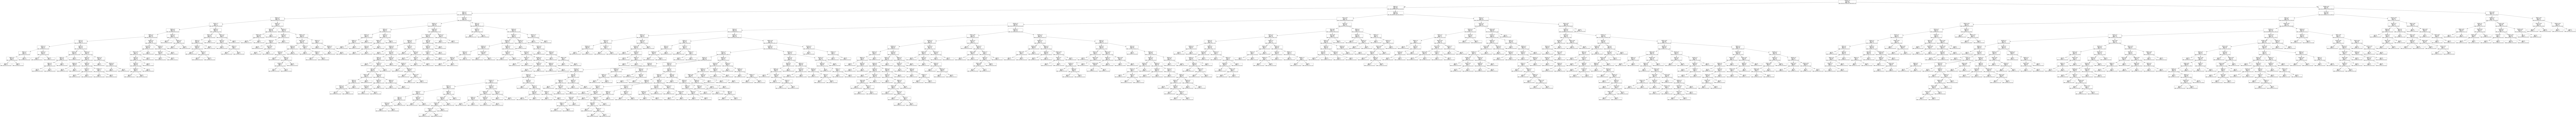

In [12]:
from sklearn.tree import export_graphviz
import pydot
rf = rf.fit(X_train, y_train)
export_graphviz(rf.estimators_[0], out_file='tree_from_forest.dot')
(graph,) = pydot.graph_from_dot_file('tree_from_forest.dot')
graph.write_png('tree_from_forest.png')

from IPython.display import Image
Image(filename = 'tree_from_forest.png')

In [13]:
# gridsearch crossvalidation (cv parameter)
# 

In [14]:
# drop in single example to see prediction
predictions = rf.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,2.0,2.0
1,1.0,4.0
2,2.0,9.0
3,1.0,3.0
4,0.0,0.0
5,4.0,1.0
6,6.0,0.0
7,0.0,0.0
8,2.0,2.0
9,0.0,6.0


In [15]:
from sklearn.metrics import confusion_matrix
thing = confusion_matrix(y_test, predictions)
thing

thing = thing.astype('float') / thing.sum(axis=1)[:, np.newaxis]

thing

array([[0.80254777, 0.01273885, 0.        , 0.03184713, 0.07006369,
        0.        , 0.01910828, 0.00636943, 0.05732484, 0.        ],
       [0.        , 0.60689655, 0.02068966, 0.03448276, 0.17931034,
        0.        , 0.04137931, 0.03448276, 0.08275862, 0.        ],
       [0.        , 0.05384615, 0.79230769, 0.        , 0.07692308,
        0.        , 0.02307692, 0.        , 0.05384615, 0.        ],
       [0.06315789, 0.08421053, 0.01052632, 0.58947368, 0.15789474,
        0.        , 0.04210526, 0.04210526, 0.01052632, 0.        ],
       [0.02097902, 0.16083916, 0.02797203, 0.06993007, 0.58041958,
        0.        , 0.01398601, 0.06993007, 0.04895105, 0.00699301],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.02797203, 0.02097902, 0.        , 0.        , 0.00699301,
        0.        , 0.92307692, 0.02097902, 0.        , 0.        ],
       [0.        , 0.02453988, 0.       

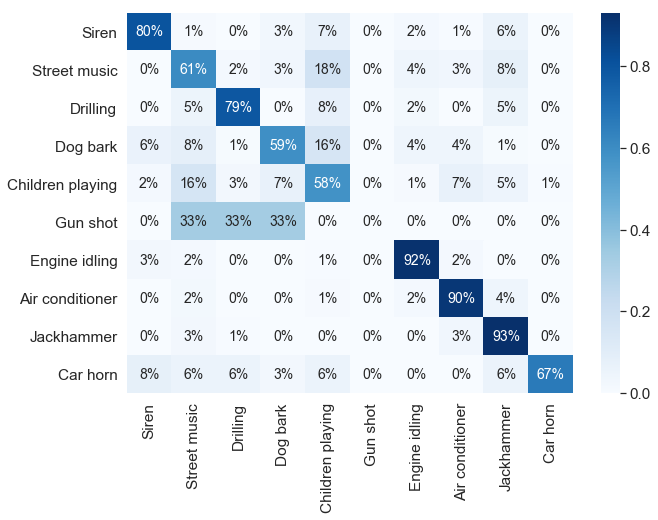

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(thing, index = [i[1].replace('_', ' ').capitalize() for i in catalog],
                  columns = [i[1].replace('_', ' ').capitalize() for i in catalog])

sn.set(font_scale=1.4)#for label size
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues',annot_kws={"size": 14}, fmt='.0%')# font size